# Práctica 4

In [88]:
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

### Ejercicio. Elementos de probabilidad
¿Cómo representar las probabilidades anteriores con la función urnsamples?
* Lanzamiento de un dado justo
* Lanzamiento de una moneda cargada

In [4]:
library(prob)

Loading required package: combinat

Attaching package: 'combinat'

The following object is masked from 'package:utils':

    combn

Loading required package: fAsianOptions
Loading required package: timeDate
Loading required package: timeSeries
Loading required package: fBasics
Loading required package: fOptions

Attaching package: 'prob'

The following objects are masked from 'package:base':

    intersect, setdiff, union



In [9]:
#Podemos usar urnsamples simular el lanzamiento de un dado
probspace(urnsamples(c(1:6),size=1))

out,probs
<int>,<dbl>
1,0.1666667
2,0.1666667
3,0.1666667
4,0.1666667
5,0.1666667
6,0.1666667


In [12]:
#También para simular el lanzamiento de una moneda cargada
x<-c(rep("aguila",3),rep("sol",7))
marginal(probspace(urnsamples(x,size=1)))

out,probs
<fct>,<dbl>
aguila,0.3
sol,0.7


### Ejercicio. Probabilidad condicional
Considérese una urna con $10$ canicas: $7$ son rojas y $3$ son verdes y se seleccionan $3$ canicas. 
* Extraer dos canicas rojas
* Extraer roja, verde, roja (en este orden)
* Extraer roja, verde, roja (no importa el orden)

In [50]:
#Generamos el arreglo de 10 canicas y el espacio de probabilidad

x<-c(rep("red",7),rep("green",3)) # Armamos la muestra de 10 canicas 
p_s<-probspace(urnsamples(x,size=3,ordered=T,replace=F)) #Calculamos el espacio muestral y el espacio de probabilidades
#Nota. no usamos el caso ordered=F para tener un espacion que nos sirva para los 3 casos a calcular

In [58]:
#Calculamos extraer dos canicas rojas
#Tomamos en cuenta el caso de solamente 2 rojas y el caso de 3 rojas

p<-Prob(p_s,isrep(p_s,vals="red",nrep=2)) # Buscamos los casos en que aparecen dos canicas rojas
p<-p+Prob(p_s,isrep(p_s,vals="red",nrep=3)) # Buscamos los casos en que aparecen dos canicas rojas
print("La probabilidad de sacar al menos dos canicas rojas es:")
p

[1] "La probabilidad de sacar al menos dos canicas rojas es:"


[1] 0.8166667

In [52]:
#Extraer roja verde roja (en ese orden)

p<-Prob(p_s,X1=="red" & X2=="green" & X3=="red") # Buscamos los casos en que aparecen dos canicas rojas
print("La probabilidad de sacar roja verde roja (en ese orden) es:")
p

[1] "La probabilidad de sacar roja verde roja (en ese orden) es:"


[1] 0.175

In [56]:
#Extraer roja verde roja (sin orden)
#Es similar a solamente extraer dos canicas rojas

p<-Prob(p_s,isrep(p_s,vals="red",nrep=2)) # Buscamos los casos en que aparecen dos canicas rojas
print("La probabilidad de sacar dos canicas rojas es:")
p

[1] "La probabilidad de sacar dos canicas rojas es:"


[1] 0.525

In [61]:
#para comprobor podemos observar el espacio del experimento con la que trabajamos 
print("Espacio de probabilidades del experimento, SI importa el orden")
marginal(p_s)
print("Espacio de probabilidades del experimento, NO importa el orden")
marginal(probspace(urnsamples(x,size=3,ordered=F,replace=F)))

[1] "Espacio de probabilidades del experimento, SI importa el orden"


X1,X2,X3,probs
<fct>,<fct>,<fct>,<dbl>
green,green,green,0.008333333
red,green,green,0.058333333
green,red,green,0.058333333
red,red,green,0.175000000
green,green,red,0.058333333
red,green,red,0.175000000
green,red,red,0.175000000
red,red,red,0.291666667


[1] "Espacio de probabilidades del experimento, NO importa el orden"


X1,X2,X3,probs
<fct>,<fct>,<fct>,<dbl>
green,green,green,0.008333333
red,green,green,0.175000000
red,red,green,0.525000000
red,red,red,0.291666667


### Ejercicio. Variables aleatorias
1. Encontrar los histogramas de probabilidad para las distribuciones asociadas a las siguientes variables aleatorias:
    1. El número de águilas que aparecen cuando lanzamos tres monedas al aire.


In [95]:
library(ggplot2)
options(repr.plot.width=4, repr.plot.height=4) #esta línea sólo se ejecuta para jupyterlab con R

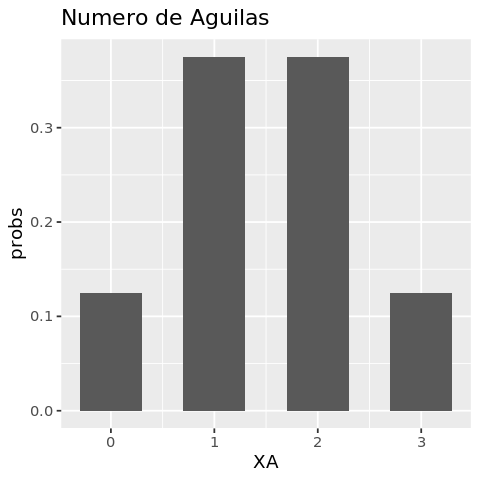

In [101]:
#Vamos a considerar sol=0 y aguila=1

p_s<-probspace(urnsamples(c(0,1),size=3,ordered=T,replace=T))
p_s_xa<-addrv(p_s,FUN=sum,invars=c("X1","X2","X3"),name="XA")
p_s_xa<-marginal(p_s_xa,"XA")
g<-ggplot(data=p_s_xa,aes(x=XA,y=probs))+
    geom_col(width=.6)+
    ggtitle("Numero de Aguilas")
g

    2. La suma de los números de las caras cuando se lanzan dos dados.

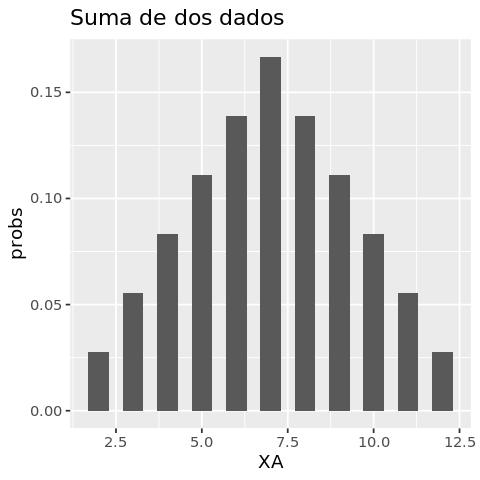

In [106]:
p_s<-probspace(urnsamples(c(1:6),size=2,ordered=T,replace=T)) # hacemos el espacio de probabilidades
p_s<-addrv(p_s,FUN=sum,invars=c("X1","X2"),name="XA")#sumamos las dos caras
p_s<-marginal(p_s,"XA") #sumamos sobre los valores XA repetidos
#p_s
g<-ggplot(data=p_s,aes(x=XA,y=probs))+
    geom_col(width=.6)+
    ggtitle("Suma de dos dados")
g

2. Se venden 8000 boletos para una rifa de $\$5,000.00$ y cada boleto cuesta $\$2.00$.
    1. Encontrar la ganancia esperada del comprador de un boleto.
    2. Hacer la gráfica de la ganancia esperada que tiene una compradora en términos de un número de boletos $n$.

    3. ¿Cuál debería de ser el premio mínimo para que se pudiese garantizar “salir a mano” al comprar todos los boletos.

In [144]:
#ganancia esperada comprador
n<-c(1:8000)
valor_esperado<-data.frame(n=n,ve=(4998/n-2+2/n))

In [145]:
print("El valor esperado para un comprado si se venden todos los boletos es:")
valor_esperado[length(n),2]

[1] "El valor esperado para un comprado si se venden todos los boletos es:"


[1] -1.375

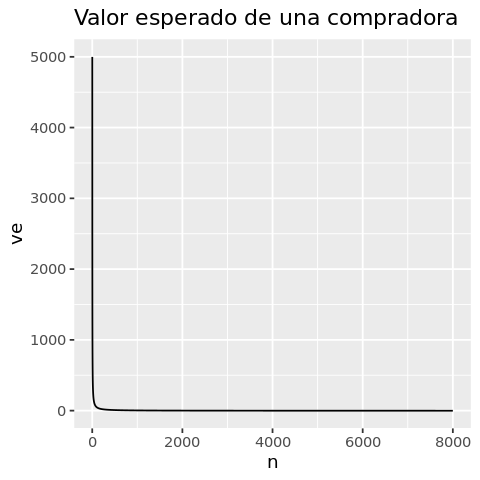

In [150]:
#grafica de valor esperado
ggplot(data=valor_esperado,aes(x=n,y=ve))+
    geom_line()+
    ggtitle("Valor esperado de una compradora")

El premio mínimo para salir a mano al comprar todos los boletos es
$ premio_{min}=p*n_{bol}$


In [152]:
#En este caso ese premio es
print("El precio minimo para quedar a mano es:")
2*8000

[1] "El precio minimo para quedar a mano es:"


[1] 16000